In [5]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from pprint import pprint

In [6]:
data = {}
folder_path = "logs/second_experiment"
for filename in os.listdir(folder_path):
    # Check if the file is a JSON file
    if filename.endswith(".json"):
        # Construct the full path of the file
        file_path = os.path.join(folder_path, filename)

        # Open and parse the JSON file
        with open(file_path, "r") as file:
            model_data = json.load(file)

        # Store the parsed data in a dictionary using the filename as the key
        model_name = model_data["model_name"]
        original_model_accuracy = model_data["original_model_accuracy"]
        quantization_data = {
            "error_threshold": model_data["error_threshold"],
            "quantized_model_accuracy": model_data["quantized_model_accuracy"],
            "average_bit_width": model_data["average_bit_width"],
            "min_quantile": model_data["min_quantile"],
            "max_quantile": model_data["max_quantile"],
            "layerwise_quantization_info": model_data["layerwise_quantization_info"],
        }

        # If the model name does not exist in the dictionary, add it
        if model_name not in data:
            data[model_name] = {
                "original_model_accuracy": original_model_accuracy,
                "quantization_data": [],
            }

        # Add the quantization data to the dictionary
        data[model_name]["quantization_data"].append(quantization_data)

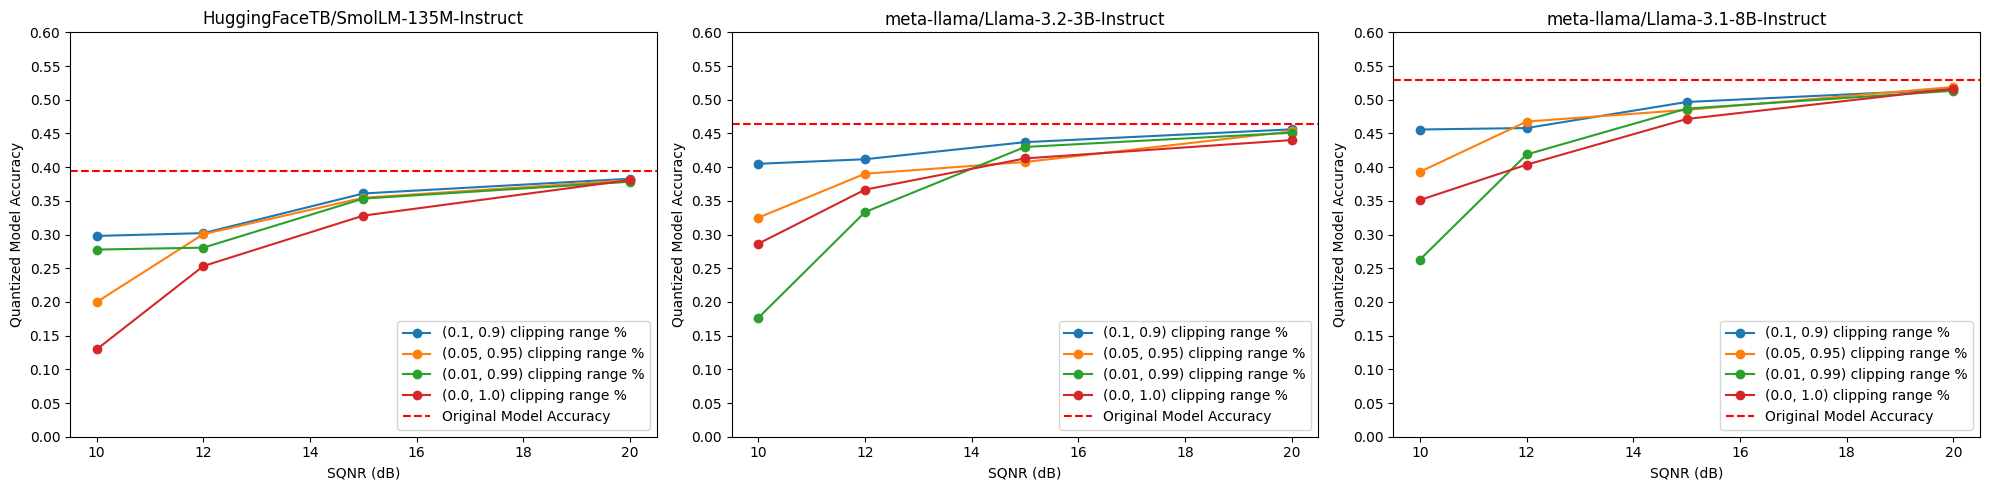

In [9]:
# Create Subplots per model
# For each quantile range [(0.0, 1.0), (0.01, 0.99), (0.05, 0.95)]
# x-axis is the sqnr dB with labels and error_threshold as value
# y-axis is the model quantized model accuracy

fig, ax = plt.subplots(1, len(data), figsize=(20, 5))

models_in_correct_order = [
    "HuggingFaceTB/SmolLM-135M-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct",
]
# sort the models in the correct order
data = {k: data[k] for k in models_in_correct_order}
for i, (model_name, model_data) in enumerate(data.items()):
    original_model_accuracy = model_data["original_model_accuracy"]
    quantization_data = model_data["quantization_data"]
    lines = []

    for quantile_range in [(0.1, 0.9), (0.05, 0.95), (0.01, 0.99), (0.0, 1.0)]:
        x = []
        y = []

        for quantization_info in quantization_data:
            if (
                quantization_info["min_quantile"] != quantile_range[0]
                or quantization_info["max_quantile"] != quantile_range[1]
            ):
                continue
            sqnr = quantization_info["error_threshold"]
            quantized_model_accuracy = quantization_info["quantized_model_accuracy"]
            layerwise_quantization_info = quantization_info[
                "layerwise_quantization_info"
            ]

            x.append(sqnr)
            y.append(quantized_model_accuracy)

        # Sort the x and y values based on the x values
        x, y = zip(*sorted(zip(x, y)))

        # (line,) = ax[i].plot(x, y, label=f"{quantile_range} quantile range")
        # plot with markers
        (line,) = ax[i].plot(
            x,
            y,
            marker="o",
            label=f"{quantile_range} clipping range %",
        )
        lines.append(line)

    ax[i].axhline(y=original_model_accuracy, color="r", linestyle="--")
    # add horizontal line to legend
    lines.append(
        mpl.lines.Line2D(
            [0], [0], color="r", linestyle="--", label="Original Model Accuracy"
        )
    )

    # use 0 to .60 on y axis in steps of 0.05
    ax[i].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
    # set axis limits
    ax[i].set_ylim(0, 0.6)

    ax[i].set_title(model_name)
    ax[i].set_xlabel("SQNR (dB)")
    ax[i].set_ylabel("Quantized Model Accuracy")
    # set location of legend down right
    ax[i].legend(handles=lines, loc="lower right")
# sort plots by moving the last to first plot
plt.tight_layout()
plt.show()

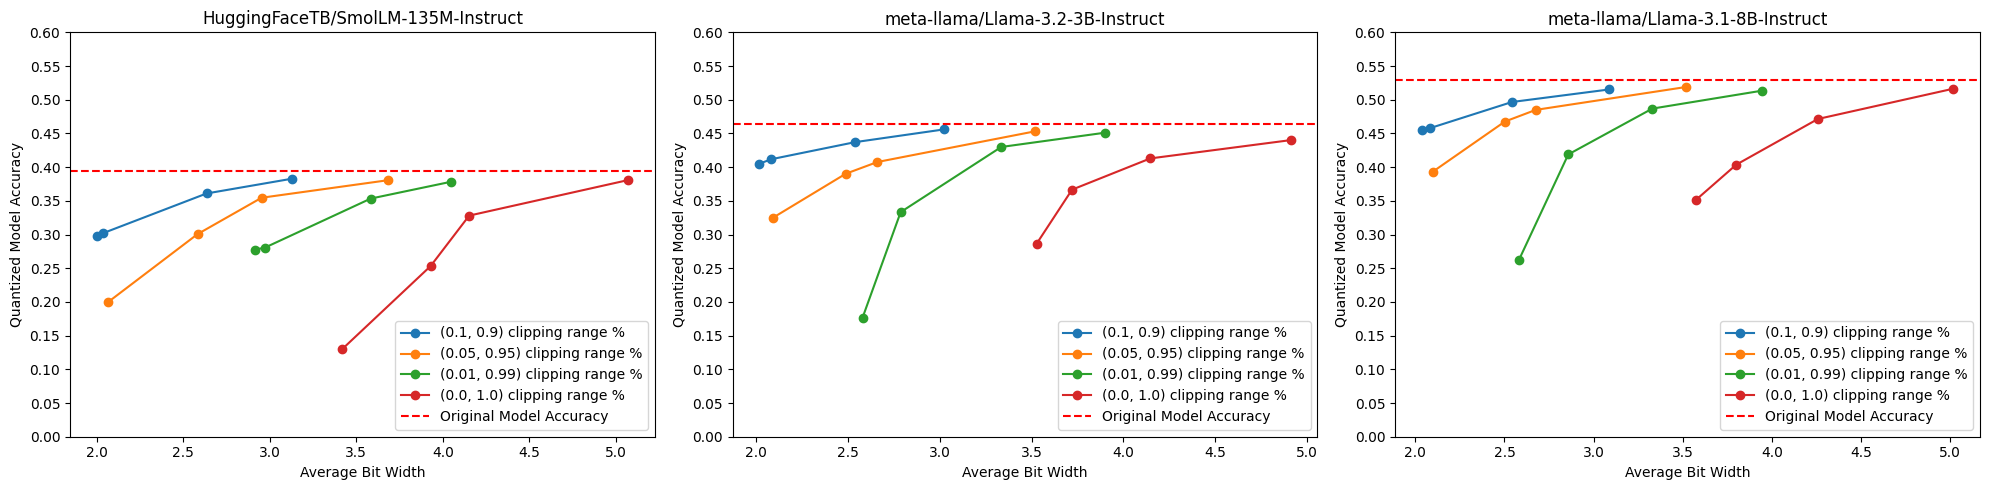

In [10]:
# Create Subplots per model
# For each quantile range [(0.0, 1.0), (0.01, 0.99), (0.05, 0.95)]
# x-axis is the sqnr dB with labels and error_threshold as value
# y-axis is the model quantized model accuracy

fig, ax = plt.subplots(1, len(data), figsize=(20, 5))

models_in_correct_order = [
    "HuggingFaceTB/SmolLM-135M-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct",
]
# sort the models in the correct order
data = {k: data[k] for k in models_in_correct_order}
for i, (model_name, model_data) in enumerate(data.items()):
    original_model_accuracy = model_data["original_model_accuracy"]
    quantization_data = model_data["quantization_data"]
    lines = []

    for quantile_range in [(0.1, 0.9), (0.05, 0.95), (0.01, 0.99), (0.0, 1.0)]:
        x = []
        y = []

        for quantization_info in quantization_data:
            if (
                quantization_info["min_quantile"] != quantile_range[0]
                or quantization_info["max_quantile"] != quantile_range[1]
            ):
                continue
            average_bit_width = quantization_info["average_bit_width"]
            quantized_model_accuracy = quantization_info["quantized_model_accuracy"]
            layerwise_quantization_info = quantization_info[
                "layerwise_quantization_info"
            ]

            x.append(average_bit_width)
            y.append(quantized_model_accuracy)

        # Sort the x and y values based on the x values
        x, y = zip(*sorted(zip(x, y)))

        # (line,) = ax[i].plot(x, y, label=f"{quantile_range} quantile range")
        # plot with markers
        (line,) = ax[i].plot(
            x,
            y,
            marker="o",
            label=f"{quantile_range} clipping range %",
        )
        lines.append(line)

    ax[i].axhline(y=original_model_accuracy, color="r", linestyle="--")
    # add horizontal line to legend
    lines.append(
        mpl.lines.Line2D(
            [0], [0], color="r", linestyle="--", label="Original Model Accuracy"
        )
    )

    # use 0 to .60 on y axis in steps of 0.05
    ax[i].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
    # set axis limits
    ax[i].set_ylim(0, 0.6)

    ax[i].set_title(model_name)
    ax[i].set_xlabel("Average Bit Width")
    ax[i].set_ylabel("Quantized Model Accuracy")
    ax[i].legend(handles=lines, loc="lower right")
# sort plots by moving the last to first plot
plt.tight_layout()
plt.show()